<a href="https://colab.research.google.com/github/fiaazwa/DeepLearning/blob/main/DaapLearning02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === [1] Import Libraries ===
# Mengimpor pustaka yang dibutuhkan
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from PIL import Image

In [2]:
# === [2] Mount Google Drive ===
# Mount Google Drive agar bisa akses dataset
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Dataset_DeepLearning'
import os
print(os.listdir(data_dir))

Mounted at /content/drive
['test', 'training', 'val']


In [3]:
# === [3] Data Transforms ===
# Transformasi data dan augmentasi
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [4]:
import os

print("Train exists:", os.path.exists("/content/drive/MyDrive/Dataset_DeepLearning/train"))
print("Val exists:", os.path.exists("/content/drive/MyDrive/Dataset_DeepLearning/val"))
print("Test exists:", os.path.exists("/content/drive/MyDrive/Dataset_DeepLearning/test"))


Train exists: False
Val exists: True
Test exists: True


In [5]:
# === [4] Load Dataset ===
train_data = ImageFolder(os.path.join(data_dir, 'training'), transform=transform_train)
val_data = ImageFolder(os.path.join(data_dir, 'val'), transform=transform_test)
test_data = ImageFolder(os.path.join(data_dir, 'test'), transform=transform_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

class_names = train_data.classes

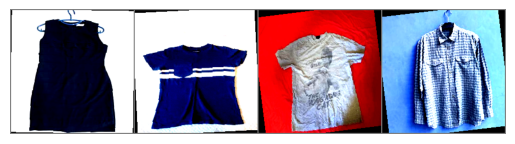

gaun kaos kaos kemeja


In [6]:
# === [5] Visualize Sample Images ===
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join(f'{class_names[labels[j]]}' for j in range(4)))

In [7]:
# === [6] Load Pretrained Model (ResNet18) ===
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# Gunakan GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 204MB/s]


In [8]:
# === [7] Loss Function and Optimizer ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# === [8] Training Loop ===
epochs = 50
train_losses, val_losses, val_accuracies = [], [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    correct, total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")


Epoch [1/50], Train Loss: 0.6833, Val Loss: 2.2882, Val Acc: 63.33%
Epoch [2/50], Train Loss: 0.3199, Val Loss: 1.2112, Val Acc: 66.67%
Epoch [3/50], Train Loss: 0.1822, Val Loss: 0.5494, Val Acc: 81.67%
Epoch [4/50], Train Loss: 0.1878, Val Loss: 0.3056, Val Acc: 86.67%
Epoch [5/50], Train Loss: 0.1377, Val Loss: 0.6393, Val Acc: 78.89%
Epoch [6/50], Train Loss: 0.1873, Val Loss: 0.7142, Val Acc: 77.22%
Epoch [7/50], Train Loss: 0.1877, Val Loss: 0.4571, Val Acc: 83.33%
Epoch [8/50], Train Loss: 0.1633, Val Loss: 0.4940, Val Acc: 83.33%
Epoch [9/50], Train Loss: 0.1669, Val Loss: 0.3739, Val Acc: 86.67%
Epoch [10/50], Train Loss: 0.1070, Val Loss: 0.3964, Val Acc: 86.11%
Epoch [11/50], Train Loss: 0.1233, Val Loss: 0.5192, Val Acc: 82.22%
Epoch [12/50], Train Loss: 0.1272, Val Loss: 0.4114, Val Acc: 87.78%
Epoch [13/50], Train Loss: 0.0798, Val Loss: 0.3205, Val Acc: 90.00%
Epoch [14/50], Train Loss: 0.1026, Val Loss: 0.7855, Val Acc: 82.78%
Epoch [15/50], Train Loss: 0.0974, Val Loss